In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib as kl
import os
import warnings

os.environ['KERAS_BACKEND']='tensorflow'
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = 'Kaiti'
plt.rcParams['axes.unicode_minus'] = False
PIC_PATH = "../../models/image/image2"
DATA_PATH = '../../data'
RESULT_PATH = '../../data/summary'

In [2]:
def create_dir(file_path):
    if os.path.exists(file_path):
        return
    os.makedirs(file_path)

create_dir(PIC_PATH)

In [3]:
short = pd.read_excel(RESULT_PATH + '/result1_1.xlsx', index_col=0)
short

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,poutcome,y
user_id,,,,,,,,,,,,,
BA2200004,40,admin.,married,postgraduate,no,no,no,telephone,may,mon,151,nonexistent,no
BA2200005,56,services,married,high school,no,no,yes,telephone,may,mon,307,nonexistent,no
BA2200007,59,admin.,married,junior college,no,no,no,telephone,may,mon,139,nonexistent,no
BA2200009,24,technician,single,junior college,no,yes,no,telephone,may,mon,380,nonexistent,no
BA2200010,25,services,single,high school,no,yes,no,telephone,may,mon,50,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
BA2241172,73,retired,married,junior college,no,yes,no,cellular,nov,fri,334,nonexistent,yes
BA2241173,46,blue-collar,married,junior college,no,no,no,cellular,nov,fri,383,nonexistent,no
BA2241174,56,retired,married,undergraduate,no,yes,no,cellular,nov,fri,189,nonexistent,no


In [4]:
short.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30445 entries, BA2200004 to BA2241176
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          30445 non-null  int64 
 1   job          30445 non-null  object
 2   marital      30445 non-null  object
 3   education    30445 non-null  object
 4   default      30445 non-null  object
 5   housing      30445 non-null  object
 6   loan         30445 non-null  object
 7   contact      30445 non-null  object
 8   month        30445 non-null  object
 9   day_of_week  30445 non-null  object
 10  duration     30445 non-null  int64 
 11  poutcome     30445 non-null  object
 12  y            30445 non-null  object
dtypes: int64(2), object(11)
memory usage: 3.3+ MB


In [5]:
information = pd.DataFrame(index=short.columns, columns=short.columns)

In [6]:
def encoder(default):
    if default == 'yes':
        return 1
    return 0

short[['default', 'housing', 'loan', 'y']] = short[['default', 'housing', 'loan', 'y']].applymap(encoder)
short

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,poutcome,y
user_id,,,,,,,,,,,,,
BA2200004,40,admin.,married,postgraduate,0,0,0,telephone,may,mon,151,nonexistent,0
BA2200005,56,services,married,high school,0,0,1,telephone,may,mon,307,nonexistent,0
BA2200007,59,admin.,married,junior college,0,0,0,telephone,may,mon,139,nonexistent,0
BA2200009,24,technician,single,junior college,0,1,0,telephone,may,mon,380,nonexistent,0
BA2200010,25,services,single,high school,0,1,0,telephone,may,mon,50,nonexistent,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
BA2241172,73,retired,married,junior college,0,1,0,cellular,nov,fri,334,nonexistent,1
BA2241173,46,blue-collar,married,junior college,0,0,0,cellular,nov,fri,383,nonexistent,0
BA2241174,56,retired,married,undergraduate,0,1,0,cellular,nov,fri,189,nonexistent,0


In [7]:
short['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [8]:
MAP = {
    'edu_map': {
        'illiterate': 1,
        'highschool': 2,
        'juniorcollege': 3,
        'undergraduate': 4,
        'postgraduate': 5
    },
    'month': {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr': 4,
        'may': 5,
        'jun': 6,
        'jul': 7,
        'aug': 8,
        'sep': 9,
        'oct': 10,
        'nov': 11,
        'dec': 12
    },
    'day':{
        'mon': 1,
        'tue': 2,
        'wed': 3,
        'thu': 4,
        'fri': 5
    },
    'contact': {
        'cellular': 0,
        'telephone': 1
    },
    'dummies': [
        'job', 'marital', 'poutcome'
    ]
}

In [9]:
short['education'] = short['education'].str.replace(' ', '')

short['education'] = short['education'].map(MAP.get('edu_map'))
short['month'] = short['month'].map(MAP.get('month'))
short['day_of_week'] = short['day_of_week'].map(MAP.get('day'))
short['contact'] = short['contact'].map(MAP.get('contact'))

short

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,poutcome,y
user_id,,,,,,,,,,,,,
BA2200004,40,admin.,married,5,0,0,0,1,5,1,151,nonexistent,0
BA2200005,56,services,married,2,0,0,1,1,5,1,307,nonexistent,0
BA2200007,59,admin.,married,3,0,0,0,1,5,1,139,nonexistent,0
BA2200009,24,technician,single,3,0,1,0,1,5,1,380,nonexistent,0
BA2200010,25,services,single,2,0,1,0,1,5,1,50,nonexistent,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
BA2241172,73,retired,married,3,0,1,0,0,11,5,334,nonexistent,1
BA2241173,46,blue-collar,married,3,0,0,0,0,11,5,383,nonexistent,0
BA2241174,56,retired,married,4,0,1,0,0,11,5,189,nonexistent,0


In [10]:
dummies = pd.get_dummies(short, prefix=MAP.get('dummies'))
dummies

,age,education,default,housing,loan,contact,month,day_of_week,duration,y,...,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_nonexistent,poutcome_success
user_id,,,,,,,,,,,,,,,,,,,,,
BA2200004,40,5,0,0,0,1,5,1,151,0,...,0,0,0,0,0,1,0,0,1,0
BA2200005,56,2,0,0,1,1,5,1,307,0,...,1,0,0,0,0,1,0,0,1,0
BA2200007,59,3,0,0,0,1,5,1,139,0,...,0,0,0,0,0,1,0,0,1,0
BA2200009,24,3,0,1,0,1,5,1,380,0,...,0,0,1,0,0,0,1,0,1,0
BA2200010,25,2,0,1,0,1,5,1,50,0,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BA2241172,73,3,0,1,0,0,11,5,334,1,...,0,0,0,0,0,1,0,0,1,0
BA2241173,46,3,0,0,0,0,11,5,383,0,...,0,0,0,0,0,1,0,0,1,0
BA2241174,56,4,0,1,0,0,11,5,189,0,...,0,0,0,0,0,1,0,0,1,0


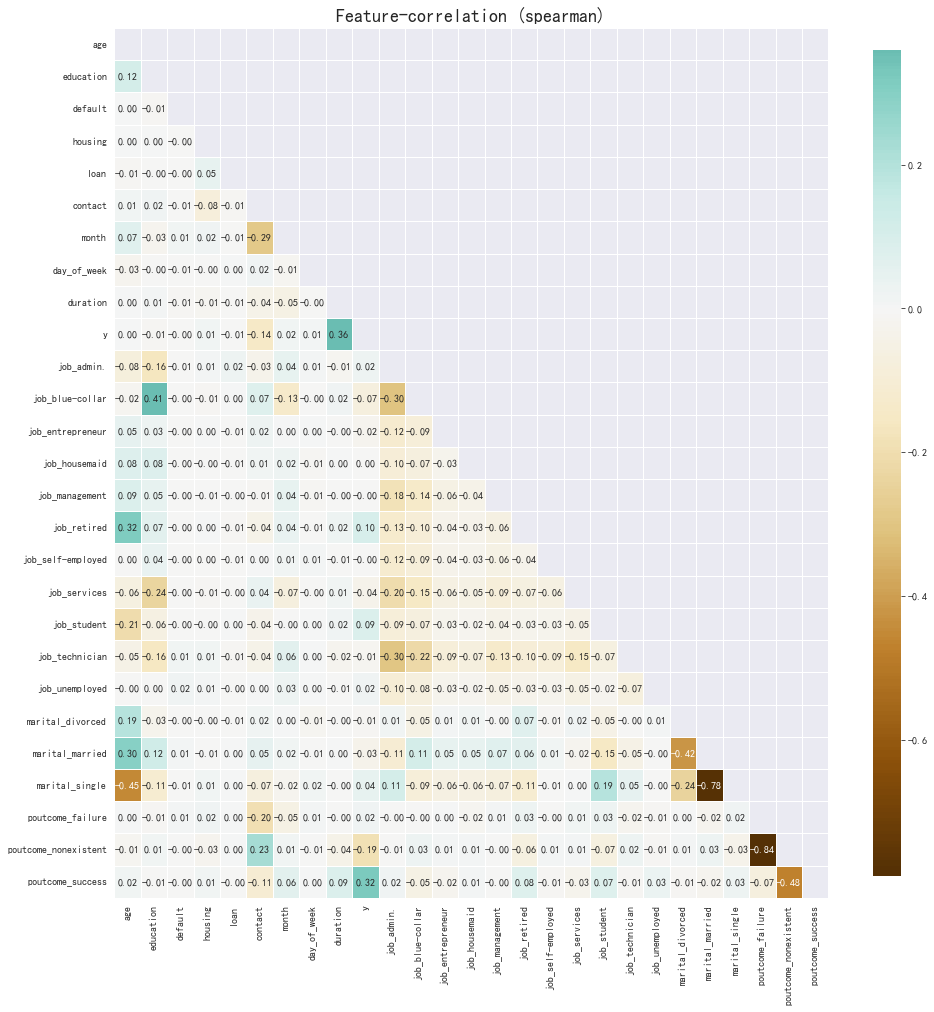

In [11]:
kl.corr_plot(dummies, method='spearman', figsize=(16, 16))
plt.savefig(PIC_PATH + '/figure1.png')

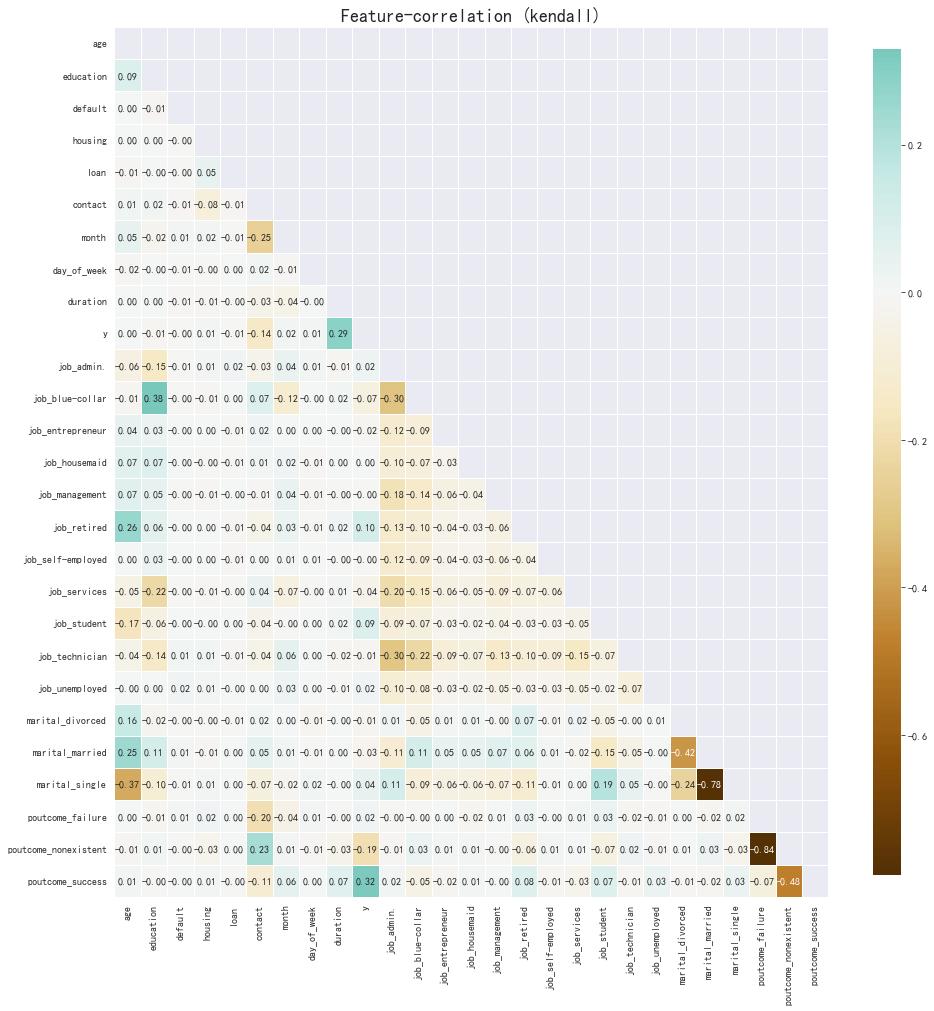

In [12]:
kl.corr_plot(dummies, method='kendall', figsize=(16, 16))
plt.savefig(PIC_PATH + '/figure2.png')

In [13]:
from category_encoders import TargetEncoder

te = TargetEncoder(cols=MAP.get('dummies')).fit(
    short.drop('y', axis=1), short['y']
)
numberic = te.transform(short.drop('y', axis=1))
numberic

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,poutcome
user_id,,,,,,,,,,,,
BA2200004,40,0.139287,0.117644,5,0,0,0,1,5,1,151,0.099674
BA2200005,56,0.090399,0.117644,2,0,0,1,1,5,1,307,0.099674
BA2200007,59,0.139287,0.117644,3,0,0,0,1,5,1,139,0.099674
BA2200009,24,0.117356,0.147736,3,0,1,0,1,5,1,380,0.099674
BA2200010,25,0.090399,0.147736,2,0,1,0,1,5,1,50,0.099674
...,...,...,...,...,...,...,...,...,...,...,...,...
BA2241172,73,0.294069,0.117644,3,0,1,0,0,11,5,334,0.099674
BA2241173,46,0.079718,0.117644,3,0,0,0,0,11,5,383,0.099674
BA2241174,56,0.294069,0.117644,4,0,1,0,0,11,5,189,0.099674


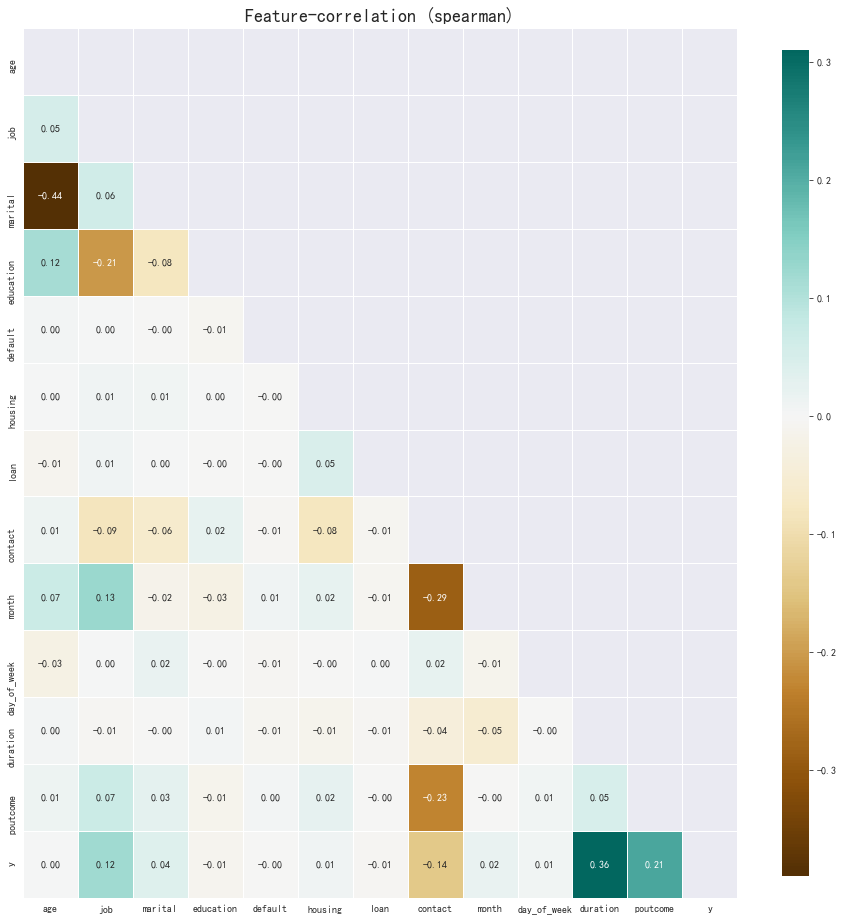

In [14]:
numberic['y'] = short['y']

kl.corr_plot(numberic, figsize=(16, 16), method='spearman')
plt.savefig(PIC_PATH + '/figure3.png', dpi=800)

In [15]:
short['age'].max()

95

In [16]:
bins = [i for i in range(0, 101, 10)]
labels = [i for i in range(0, 100, 10)]

box = pd.cut(short['age'], bins=bins, labels=labels, include_lowest=True)
box

user_id
BA2200004    30
BA2200005    50
BA2200007    50
BA2200009    20
BA2200010    20
             ..
BA2241172    70
BA2241173    40
BA2241174    50
BA2241175    40
BA2241176    70
Name: age, Length: 30445, dtype: category
Categories (10, int64): [0 < 10 < 20 < 30 ... 60 < 70 < 80 < 90]

In [17]:
dummies['age'] = box

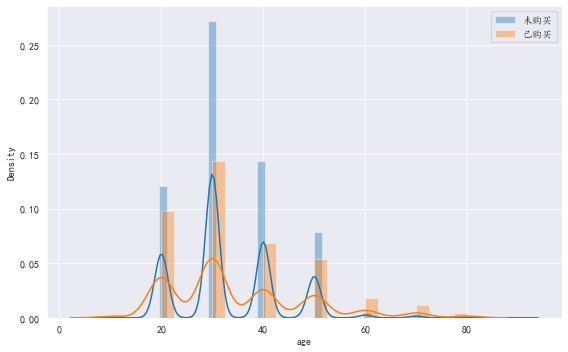

In [18]:
plt.figure(figsize=(8, 5))
sns.distplot(dummies[dummies['y'] == 0]['age'], label='未购买')
sns.distplot(dummies[dummies['y'] == 1]['age'], label='已购买')
plt.legend()
plt.tight_layout()

plt.savefig(PIC_PATH + '/figure4.png')

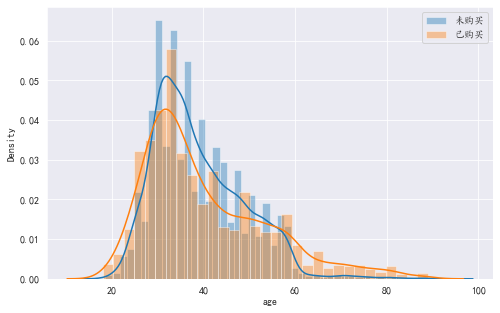

In [19]:
plt.figure(figsize=(8, 5))
sns.distplot(short[dummies['y'] == 0]['age'], label='未购买')
sns.distplot(short[dummies['y'] == 1]['age'], label='已购买')
plt.legend()
plt.savefig(PIC_PATH + '/figure5.png')

In [20]:
pie = short[short['job'].isin(['blue-collar', 'student'])]
value_count = pie[['job', 'y']].value_counts()
value_count

job          y
blue-collar  0    5218
             1     452
student      0     405
             1     203
dtype: int64

In [21]:
count = 6
PIC_NAME = PIC_PATH + f'/figure{count}.png'

def savefig():
    global count, PIC_NAME
    count += 1
    PIC_NAME = PIC_PATH + f'/figure{count}.png'
    plt.savefig(PIC_NAME)

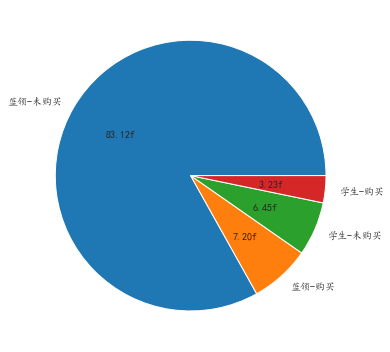

In [22]:


plt.figure(figsize=(8, 5))
label = ['蓝领-未购买', '蓝领-购买', '学生-未购买', '学生-购买']
plt.pie(value_count, labels=label, autopct="%0.2ff")
plt.tight_layout()
plt.savefig(PIC_NAME)

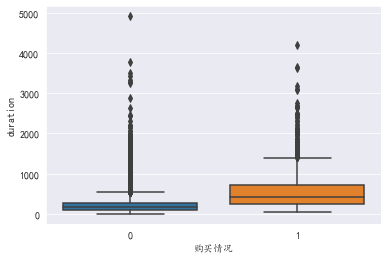

In [23]:
sns.boxplot(x='y', y='duration', data=short)
# plt.xticks(['未购买', '购买'], short.y)
plt.xlabel('购买情况')
savefig()

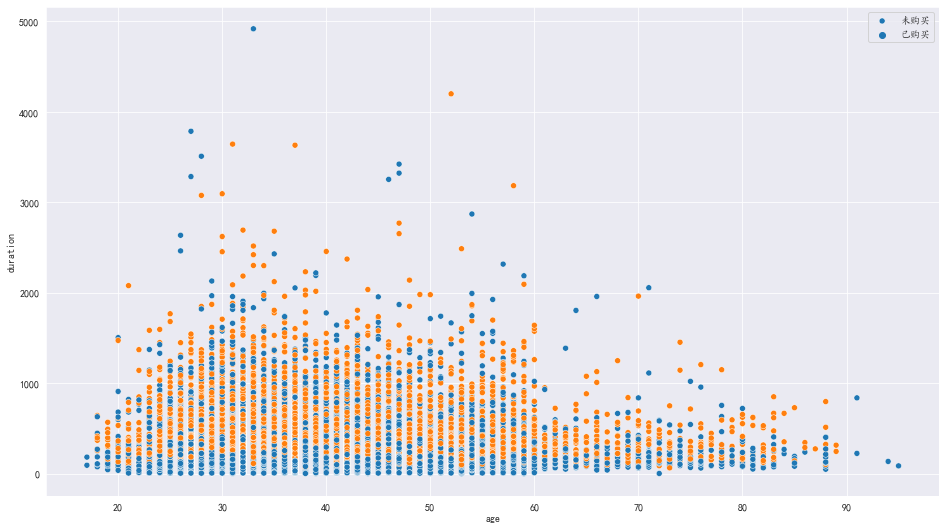

In [24]:
plt.figure(figsize=(16, 9))
sns.scatterplot(x='age', y='duration', data=short, hue='y')
plt.legend(['未购买', '已购买'])
savefig()

8